# 긍정적인 글 분류하기

In [4]:
import pandas as pd

## 긍정사전과 부정사전 가져오기

In [13]:
# 긍정사전과 부정사전 가져오기
pos_df = pd.read_csv("./data/pos_df_test.csv")
neg_df = pd.read_csv("./data/neg_df_test.csv")
# 긍정, 부정 사전  리스트로 변환 
pos_word = pos_df['word'].values.tolist()
neg_word = neg_df['word'].values.tolist()

## "sentiment1"열 추가하기
sentiment1 = 식당-미디어 모든 글의 긍정적인 단어 수 - 부정적인 수

In [17]:
naver_total = pd.read_csv("./data/naver_blog/total_power.csv")
for row in range(len(naver_total)):
    file = "./data/naver_blog/rowdata_resource/" + naver_total.iloc[row]["restaurant"] + "_" + naver_total.iloc[row]["resource"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    pos = 0
    neg = 0
    for i in range(len(data)):
        for words in pos_word:
            if words in data.iloc[i]["description"]:
                pos += 1
        for words in neg_word:
            if words in data.iloc[i]["description"]:
                neg += 1
    # 해당 파일의 감정분석 결과 저장
    naver_total.loc[row, "sentiment1"] = pos - neg
# 파일로 저장
naver_total.to_csv("./data/naver_blog/total_power.csv", index=False)

## "sentiment2"열 추가하기
sentiment2 = 식당-미디어 모든 글의 리뷰별 positive 갯수 

In [18]:
# 감정사전이 완료 되지 않았을 때
# 종합 데이터 가져오기
naver_total = pd.read_csv("./data/naver_blog/total_power.csv")
naver_total["sentiment2"] = None
for row in range(len(naver_total)):
    file = "./data/naver_blog/rowdata_resource/" + naver_total.iloc[row]["restaurant"] + "_" + naver_total.iloc[row]["resource"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    data["senti"] = None
    for i in range(len(data)):
        pos = 0
        for words in pos_word:
            if words in data.iloc[i]["description"]:
                pos += 1
        # 각 글의 긍정적인 단어가 1개만 있어도 긍정적인 글입니다.
        if pos > 0:
            data.loc[i,"senti"] = "positive"
        else:
            data.loc[i,"senti"] = "negative"
    # 해당 파일의 감정분석 결과 저장
    # positive가 반이상면 positive
    sentiment2 = len(data.loc[data["senti"] == "positive"]) 
    naver_total.loc[row, "sentiment2"] = sentiment2
# 파일로 저장
naver_total.to_csv("./data/naver_blog/total_power.csv", index=False)

## "sentiment3"열 추가하기
sentiment3 = 식당-미디어 모든 글의 리뷰별 positive - negative 갯수

In [21]:
# 감정사전이 완료 되지 않았을 때
# 종합 데이터 가져오기
naver_total = pd.read_csv("./data/naver_blog/total_power.csv")
naver_total["sentiment3"] = None
for row in range(len(naver_total)):
    file = "./data/naver_blog/rowdata_resource/" + naver_total.iloc[row]["restaurant"] + "_" + naver_total.iloc[row]["resource"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    data["senti"] = None
    for i in range(len(data)):
        pos = 0
        neg = 0 
        for words in pos_word:
            if words in data.iloc[i]["description"]:
                pos += 1
                
        for words in neg_word:
            if words in data.iloc[i]["description"]:
                neg += 1

        # 각 글의 긍정적인 단어가 1개만 있어도 긍정적인 글입니다.
        senti = pos - neg 
        
        if senti >= 0:
            data.loc[i,"senti"] = "positive"
        else:
            data.loc[i,"senti"] = "negative"
    # 해당 파일의 감정분석 결과 저장
    # positive가 반이상면 positive
    sentiment3 = len(data.loc[data["senti"] == "positive"]) - len(data.loc[data["senti"] == "negative"])
    naver_total.loc[row, "sentiment3"] = sentiment3
# 파일로 저장
naver_total.to_csv("./data/naver_blog/total_power.csv", index=False)

* sentiment1 : 해당 식당 전체 리뷰 긍정단어 - 부정단어
* sentiment2 : 해당 식당 리뷰별 positive 갯수    
* sentiment2 : 해당 식당 리뷰별 positive - negative 갯수 

In [66]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)  

In [42]:
#display(naver_total.loc[naver_total.sentiment2 == 0])

In [5]:
naver_total = pd.read_csv("./data/naver_blog/total_power.csv")

In [ ]:
In [36]: DataFrame({'count' : df1.groupby( [ "Name", "City"] ).size()}).reset_index()

In [ ]:
df = pd.DataFrame(old_df.groupby(['groupby_attribute'])['mean_attribute'].mean())
df = df.reset_index()
df

In [123]:
df_res_pos = pd.DataFrame(naver_total.groupby(['resource'])['sentiment2'].mean())
df_res_pos = df_res_pos.reset_index()
df_res_pos.columns = ['resource', 'positive_avg']


In [124]:
display(df_res_pos)

,resource,positive_avg
0,6시 내 고향,0.000000
1,골목식당,0.000000
2,김준현,0.000000
3,더들리,0.000000
4,맛있는 녀석들,0.000000
5,모닝 와이드,0.000000
6,문세윤,17.250000
7,백종원,23.111111
8,비(정지훈),0.000000
9,생방송 오늘 저녁,0.000000


In [6]:
total_group = naver_total

In [7]:
d = total_group[(total_group['sentiment1'] == 0) & (total_group['sentiment2'] == 0) & (total_group['sentiment3'] == 0)].index

total_group.drop(d, inplace = True)

In [8]:
df_group_pos = pd.DataFrame(total_group.groupby(['group'])['sentiment2'].mean())
df_group_pos = df_group_pos.reset_index()
df_group_pos.columns = ['group', 'positive_avg']


In [9]:
display(df_group_pos)

,group,positive_avg
0,방송프로그램,17.462963
1,연예인,16.961165
2,유튜버,1.000000


# 여기 아래로 시각화 작업중 

In [15]:
matplotlib.get_cachedir()

'C:\\Users\\jh367\\.matplotlib'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트설정
from matplotlib import font_manager, rc
font_path = "./data/font/21582067_G마켓산스Medium_OTF.otf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name() # rc 함수를 통해, rcParams에 사용되는 폰트의 정식명칭을 알 수 있음
print("폰트설정 :", font_name)
rc('font', family=font_name)

# 색깔 설정
my_colors = sns.color_palette("RdPu", 8) + sns.color_palette("Purples", 2) + sns.color_palette("Blues", 10)
my_colors2 = sns.color_palette("RdPu", 1) + sns.color_palette("Purples", 1) + sns.color_palette("Blues", 1)


폰트설정 : Gmarket Sans


In [18]:
import matplotlib 
matplotlib.font_manager._rebuild()

Index(['positive_avg'], dtype='object')


TypeError: xticks() takes from 0 to 2 positional arguments but 3 were given

<Figure size 1152x648 with 0 Axes>

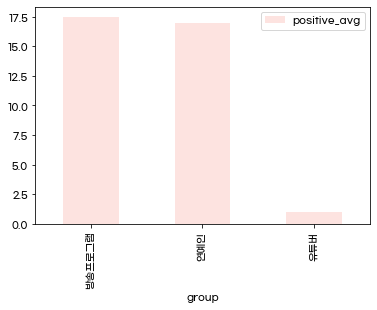

In [41]:
# matplotlib

plt.figure(figsize=(16,9))
df_group_pos.plot(kind='bar', color=my_colors)
plt.xticks('방송프로그램', '연예인', '유튜버')
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(bottom=0.2)
plt.show()